# **Ejemplo**

In [1]:
from scipy import array, arange, sum, sqrt
from pylab import plot, show, xlabel, ylabel, grid, legend
from numpy import linspace
from scipy.integrate import odeint

In [2]:
###### Constantes ######

e = 1.602 * 10 ** -19 # Carga del electron
V0 = 100 * e #Joules
L = 5.29e-11 #Radio de Bohr
a = 10 ** -11  # Angstrom
x_0 = -10 ** -10 # Posición Inicial
x_f =10 ** -10 # Posición Inicial
psi_0 = 0.0 # Función Psi
hbar = 1.05457 * 10 ** -34  # J*s, constante de planck cuantizada
m = 9.10938 * 10 ** -31 # masa del electron en kg
N = 1000  # número de pasos
h = (x_f - x_0) / N # Intervalos

######################################################


###### Funciones Definidas ######
def psi(E):
    def f(r, x):
        
        ###### Parámetros para el ejemplo, V(x)=0 ######
        
        def V(x):
             return 0.0
        
        #############################################
        
        
        #def V(x):
            #return V0 * x ** 2 / a ** 2

        psi = r[0]
        phi = r[1]
        return array([phi, (2 * m / hbar ** 2) * (V(x) - E) * psi], float)
    
#################################################################################


###### Solución Con Odeint ######

    r = array([psi_0, 1.0] ,float)
    x=linspace(0,L,N)
    
    r_sol=odeint(f,r,x)
    funcion_onda = r_sol[:,0]
    return array(funcion_onda, float)

###################################################################################


###### Método de la secante ######

def secant_root(E1, E2):
    tol_error = e / 1000 #  eV
    funcion_onda = psi(E1)
    psi2 = funcion_onda[N - 1]
    while abs(E1 - E2) > tol_error:
        funcion_onda = psi(E2)
        psi1, psi2 = psi2, funcion_onda[N - 1]
        E1, E2 = E2, E2 - psi2 * (E2 - E1) / (psi2 - psi1)
        
####################################################################################
        

###### Normalización de la función de onda, utilizando regla de simpson's ######

    mod_squared = funcion_onda * funcion_onda
    integral = h / 3 *(mod_squared[0] + mod_squared[N//2 - 1] + \
                       4 * sum(mod_squared[1 : N//2 : 2]) + 2 * sum(mod_squared[0 : N//2 + 1 : 2]) )

    return E2 / e, funcion_onda / sqrt(2*integral)

######################################################################################


###### Primer nivel del oscilador armónico ######

E0, psi0 = secant_root(0, 0.5*e)

#####################################################################################

E_0 =  134.3872134208539 eV


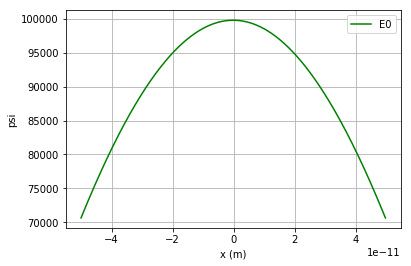

In [3]:
###### Gráfica ######

print('E_0 = ', E0, 'eV')
xpoints = arange(x_0, x_f, h)
x_range = slice(N // 4 ,  3 * N // 4 , 1)
plot(xpoints[x_range], psi0[x_range], 'g', label="E0")
xlabel('x (m)')
ylabel('psi')
grid("on")
legend()
show()
######################################################################################

# **Ejercicio**

In [4]:
###### Constantes ######

e = 1.602 * 10 ** -19 # Carga del electron
V0 = 50 * e  # Joules
L = 5.29e-11 #Radio de Bohr
a = 10 ** -11  # Angstrom
x_0 = -10 ** -10 # Posición Inicial
x_f =10 ** -10 # Posición Inicial
psi_0 = 0.0 # Función Psi
hbar = 1.05457 * 10 ** -34  # J*s, constante de planck cuantizada
m = 9.10938 * 10 ** -31 # masa del electron en kg
N = 1000  # número de pasos
h = (x_f - x_0) / N # Intervalos

######################################################


###### Funciones Definidas ######
def psi(E):
    def f(r, x):
        
        ###### Parámetros para el ejemplo, V(x)=0 ######
        
        #def V(x):
             #return 0.0
        
        #############################################
        
        
        def V(x):
            return V0 * x ** 2 / a ** 2

        psi = r[0]
        phi = r[1]
        return array([phi, (2 * m / hbar ** 2) * (V(x) - E) * psi], float)
    
#################################################################################


###### Solución Con Odeint ######

    r = array([psi_0, 1.0] ,float)
    x=linspace(-10*a,10*a,N)
    
    
    r_sol=odeint(f,r,x)
    funcion_onda = r_sol[:,0]
    return array(funcion_onda, float)

###################################################################################


###### Método de la secante ######

def secant_root(E1, E2):
    tol_error = e / 1000 #  eV
    funcion_onda = psi(E1)
    psi2 = funcion_onda[N - 1]
    while abs(E1 - E2) > tol_error:
        funcion_onda = psi(E2)
        psi1, psi2 = psi2, funcion_onda[N - 1]
        E1, E2 = E2, E2 - psi2 * (E2 - E1) / (psi2 - psi1)
        
####################################################################################
        

###### Normalización de la función de onda, utilizando regla de simpson's ######

    mod_squared = funcion_onda * funcion_onda
    integral = h / 3 *(mod_squared[0] + mod_squared[N//2 - 1] + \
                       4 * sum(mod_squared[1 : N//2 : 2]) + 2 * sum(mod_squared[0 : N//2 + 1 : 2]) )

    return E2 / e, funcion_onda / sqrt(2*integral)

######################################################################################


###### Tres primeros niveles del oscilador armonico ######

E0, psi0 = secant_root(0, 0.5*e)
E1, psi1 = secant_root(400*e, 600*e)
E2, psi2 = secant_root(900*e, 1100*e)

#####################################################################################

E_0 =  138.0288124160085 eV
E_1 =  690.1440340423551 eV
E_2 =  1242.2593011558902 eV


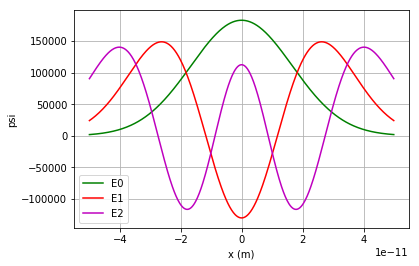

In [5]:
###### Gráfica ######

print('E_0 = ', E0, 'eV')
print('E_1 = ', E1, 'eV')
print('E_2 = ', E2, 'eV')
xpoints = arange(x_0, x_f, h)
x_range = slice(N // 4 ,  3 * N // 4 , 1)
plot(xpoints[x_range], psi0[x_range], 'g', label="E0")
plot(xpoints[x_range], psi1[x_range], 'r', label = "E1")
plot(xpoints[x_range], psi2[x_range], 'm', label = "E2")
xlabel('x (m)')
ylabel('psi')
grid("on")
legend()
show()
######################################################################################

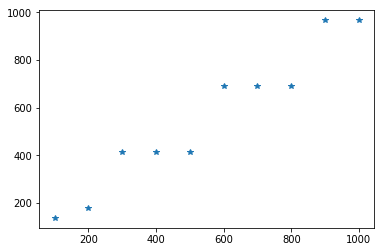

In [6]:
energias=[]
I=[]
i=0
for i in arange(0,1000,100):
    E0, psi0 = secant_root(i*e, (i+100)*e)
    i=i+100
    I.append(i)
    energias.append(E0)
plot(I,energias,'*')    